In [84]:
import os
# import allel
from scipy import stats

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# from collections import defaultdict
# from matplotlib.pyplot import figure
from tqdm import tqdm
from pathlib import Path
# from itertools import combinations 
# from scipy.ndimage.filters import median_filter
# from IPython.display import Image 
# import glob
# import pybedtools
# import gffutils
# import vcf
# import itertools
# from scipy.stats import linregress

In [2]:
proj_dir="/master/nplatt/sch_hae_scan"
results_dir="{}/results".format(proj_dir)
os.chdir(results_dir)

In [26]:
pca_df=pd.read_csv("{}/pca/pca_df.csv".format(results_dir), sep=",")
pca_df.head()

,sample_name,1,2,3,4,5,6,7,8,9,...,locale,host,phenotype,project,data_type,lat,lon,kmeans_group,pca_species,kmeans_label
0,Sb_NG_au_1.2,-0.173881,0.026648,0.002356,0.003491,0.040333,0.056209,0.034671,-0.018987,0.006714,...,na,cow,bovis,nigeria,genome,7.067448,6.271139,2,s_bovis,sb
1,Sb_NG_au_2.10,-0.173042,0.026219,0.002305,0.004889,0.041296,0.059342,0.034267,-0.018533,0.003969,...,na,cow,bovis,nigeria,genome,7.067448,6.271139,2,s_bovis,sb
2,Sb_NG_au_2.13,-0.173645,0.026263,0.002368,0.000767,0.042174,0.060543,0.032764,-0.020686,0.002916,...,na,cow,bovis,nigeria,genome,7.067448,6.271139,2,s_bovis,sb
3,Sb_NG_au_2.5,-0.172982,0.026137,0.003690,-0.002314,0.042092,0.059532,0.033454,-0.014835,0.000759,...,na,cow,bovis,nigeria,genome,7.067448,6.271139,2,s_bovis,sb
4,Sb_NG_au_2.6,-0.172250,0.026551,0.002041,0.004355,0.042407,0.059827,0.033576,-0.020790,0.009542,...,na,cow,bovis,nigeria,genome,7.067448,6.271139,2,s_bovis,sb


In [5]:
Path("{}/intro_desert".format(results_dir)).mkdir(parents=True, exist_ok=True)
os.chdir("{}/intro_desert".format(results_dir))

In [7]:
df=pd.read_csv("../rfmix/rfmix_perc_bovis_genome.csv", sep=",", header=0)
df

,chrom,s_pos,e_pos,s_gpos,e_gpos,n_snps,n_sb,n_sh_nw,n_sh_se,perc_sb,perc_sh_nw,perc_sh_se,x_start,x_end,color
0,NC_067195.1,14416,75442,0.05,0.26,582,0,156,42,1.0,0.048780,0.0,320428073,320489099,#7bade3
1,NC_067195.1,75442,106309,0.26,0.37,335,0,155,42,1.0,0.054878,0.0,320489099,320519966,#7bade3
2,NC_067195.1,106309,146168,0.37,0.51,465,0,154,42,1.0,0.060976,0.0,320519966,320559825,#7bade3
3,NC_067195.1,146168,156662,0.51,0.55,580,0,154,42,1.0,0.060976,0.0,320559825,320570319,#7bade3
4,NC_067195.1,156662,164518,0.55,0.57,885,0,155,42,1.0,0.054878,0.0,320570319,320578175,#7bade3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39472,NC_067202.1,19335566,19381118,67.37,67.53,4950,0,159,42,1.0,0.030488,0.0,317768034,317813586,#078d70
39473,NC_067202.1,19381118,19401743,67.53,67.60,2335,0,158,42,1.0,0.036585,0.0,317813586,317834211,#078d70
39474,NC_067202.1,19401743,19427939,67.60,67.69,2290,0,159,42,1.0,0.030488,0.0,317834211,317860407,#078d70
39475,NC_067202.1,19427939,19464116,67.69,67.82,1825,0,160,42,1.0,0.024390,0.0,317860407,317896584,#078d70


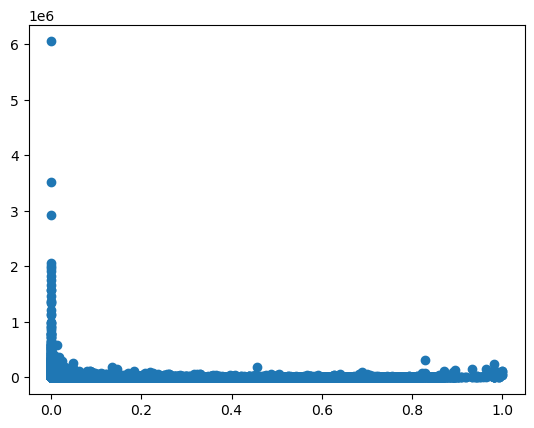

In [11]:
x=df["perc_sh_nw"]
y=df["e_pos"] - df["s_pos"]

plt.scatter(x, y)
plt.show()


In [113]:
tmp_df = df.loc[df["perc_sh_nw"] == 0].reset_index(drop=True)

# tmp_df[["chrom", "s_pos", "e_pos"]].to_csv("no_intro.bed", sep="\t", header=False, index=False)

# !conda run -n bedtools bedtools merge -d 1 -i no_intro.bed >merged.bed

In [21]:
m_df=pd.read_csv("merged.bed", sep="\t", header=0)
m_df.columns=["chrom", "start", "end"]

In [22]:
m_df["size"] = m_df["end"] - m_df["start"] + 1

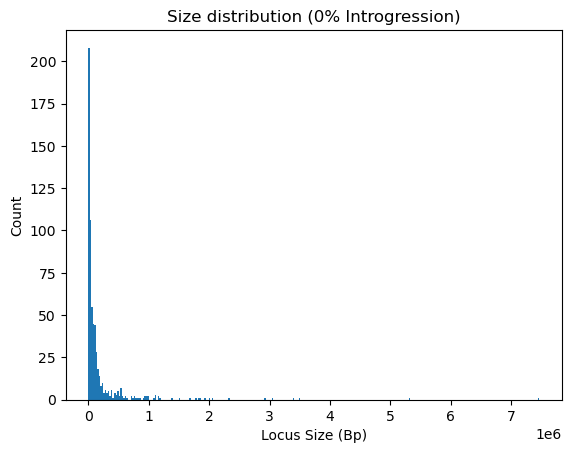

In [162]:
plt.hist(m_df["size"], bins=300)
# plt.xlim([0, 500000])
plt.xlabel("Locus Size (Bp)")
plt.ylabel("Count")
plt.title("Size distribution (0% Introgression)")
plt.savefig('size_dist_hist.png', format='png', facecolor="white", dpi=600, bbox_inches='tight')
plt.savefig('size_dist_hist.svg', format="svg")
plt.show()

In [107]:
tmp_df

,chrom,s_pos,e_pos,s_gpos,e_gpos,n_snps,n_sb,n_sh_nw,n_sh_se,perc_sb,perc_sh_nw,perc_sh_se,x_start,x_end,color
666,NC_067195.1,4126448,4137299,14.38,14.42,225,0,164,42,1.0,0.0,0.0,324540105,324550956,#7bade3
688,NC_067195.1,4349111,4349341,15.15,15.15,50,0,164,42,1.0,0.0,0.0,324762768,324762998,#7bade3
701,NC_067195.1,4479960,4480048,15.61,15.61,15,0,164,42,1.0,0.0,0.0,324893617,324893705,#7bade3
723,NC_067195.1,4747000,4747745,16.54,16.54,100,0,164,42,1.0,0.0,0.0,325160657,325161402,#7bade3
732,NC_067195.1,4844065,4861984,16.88,16.94,1825,0,164,42,1.0,0.0,0.0,325257722,325275641,#7bade3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38937,NC_067202.1,12426661,12441319,43.30,43.35,2095,0,164,42,1.0,0.0,0.0,310859129,310873787,#078d70
39051,NC_067202.1,14944376,15058095,52.07,52.47,10345,0,164,42,1.0,0.0,0.0,313376844,313490563,#078d70
39294,NC_067202.1,17325202,17351384,60.37,60.46,2415,0,164,42,1.0,0.0,0.0,315757670,315783852,#078d70
39296,NC_067202.1,17376986,17442669,60.55,60.78,6550,0,164,42,1.0,0.0,0.0,315809454,315875137,#078d70


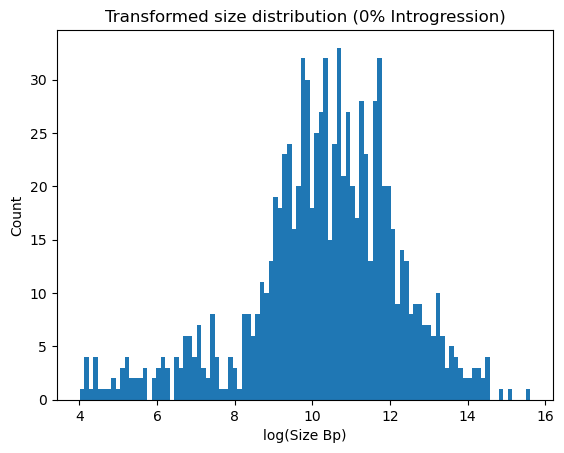

In [163]:
tmp_df["size"] = tmp_df["e_pos"] - tmp_df["s_pos"] + 1
data = tmp_df["size"]

data_log = np.log(data)

# Square root transformation
data_sqrt = np.sqrt(data)

plt.hist(data_log, bins=100)
plt.xlabel("log(Size Bp)")
plt.ylabel("Count")
plt.title("Transformed size distribution (0% Introgression)")
plt.savefig('log_size_dist_hist.png', format='png', facecolor="white", dpi=600, bbox_inches='tight')
plt.savefig('log_size_dist_hist.svg', format="svg")
plt.show()

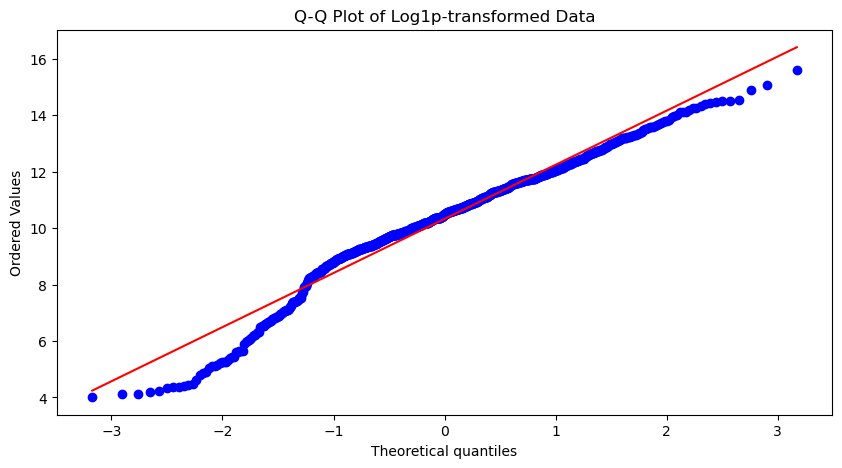

Shapiro-Wilk test p-value: 9.100727983712975e-14


In [165]:

# Apply log1p transformation to the data
data_log = np.log(data)

# Q-Q plot to check normality
plt.figure(figsize=(10, 5))
stats.probplot(data_log, dist="norm", plot=plt)
plt.title('Q-Q Plot of Log1p-transformed Data')
plt.savefig('sw_test.png', format='png', facecolor="white", dpi=600, bbox_inches='tight')
plt.savefig('sw_test.svg', format="svg")
plt.show()

# Shapiro-Wilk test for normality
shapiro_test = stats.shapiro(data_log)
print(f'Shapiro-Wilk test p-value: {shapiro_test.pvalue}')


In [116]:
# Apply log transformation to the data
data_log = np.log(data)

# Calculate robust z-scores
median = np.median(data_log)
mad = median_abs_deviation(data_log)
robust_z_scores = (data_log - median) / mad

# Determine a threshold for robust z-scores to identify outliers
threshold = 3  # You can adjust this threshold
outliers = data[robust_z_scores > threshold]

# Display the results
print("Original data:")
print(data)

print("\nLog-transformed data:")
print(data_log)

print("\nRobust z-scores:")
print(robust_z_scores)

print("\nOutliers (robust z-scores > 3):")
print(outliers)


Original data:
0       10852
1         231
2          89
3         746
4       17920
        ...  
913     14659
914    113720
915     26183
916     65684
917       886
Name: size, Length: 918, dtype: int64

Log1p-transformed data:
0       9.292105
1       5.442418
2       4.488636
3       6.614726
4       9.793673
         ...    
913     9.592810
914    11.641495
915    10.172866
916    11.092611
917     6.786717
Name: size, Length: 918, dtype: float64

Robust z-scores:
0     -1.057584
1     -4.464923
2     -5.309110
3     -3.427319
4     -0.613649
         ...   
913   -0.791431
914    1.021849
915   -0.278027
916    0.536035
917   -3.275090
Name: size, Length: 918, dtype: float64

Outliers (robust z-scores > 3):
70     1969108
74     1571079
76     1369284
88     2058945
92     2927482
95     6045374
99     1351601
104    3509056
126    1208537
127    1457804
129    1575528
133    1918785
205    1661088
438    1131535
532    1828084
673    1757817
680    1335125
703    1147774
767 

In [119]:
outliers.min()

1131535

In [120]:
outliers.max()

6045374

In [121]:
outliers.sum()

37825862

In [168]:
o_df = tmp_df.iloc[outliers.index]
o_df.loc[o_df["chrom"] == "NC_067195.1", "size"].sum()

28623671

In [151]:
tmp_df["log_size"] = data_log
tmp_df["mad"] = mad
tmp_df["robust_z_score"] = robust_z_scores
tmp_df["outlier"] = False
tmp_df.loc[outliers.index, 'outlier'] = True

# data_log = np.log(data)

# # Calculate robust z-scores
# median = np.median(data_log)
# mad = median_abs_deviation(data_log)
# robust_z_scores = (data_log - median) / mad

df = tmp_df.copy()
df.to_csv("intro_desert.csv", sep=",", header=True, index=False)
df

,chrom,s_pos,e_pos,s_gpos,e_gpos,n_snps,n_sb,n_sh_nw,n_sh_se,perc_sb,perc_sh_nw,perc_sh_se,x_start,x_end,color,size,log_size,mad,robust_z_score,outlier
0,NC_067195.1,4126448,4137299,14.38,14.42,225,0,164,42,1.0,0.0,0.0,324540105,324550956,#7bade3,10852,9.292105,1.129822,-1.057584,False
1,NC_067195.1,4349111,4349341,15.15,15.15,50,0,164,42,1.0,0.0,0.0,324762768,324762998,#7bade3,231,5.442418,1.129822,-4.464923,False
2,NC_067195.1,4479960,4480048,15.61,15.61,15,0,164,42,1.0,0.0,0.0,324893617,324893705,#7bade3,89,4.488636,1.129822,-5.309110,False
3,NC_067195.1,4747000,4747745,16.54,16.54,100,0,164,42,1.0,0.0,0.0,325160657,325161402,#7bade3,746,6.614726,1.129822,-3.427319,False
4,NC_067195.1,4844065,4861984,16.88,16.94,1825,0,164,42,1.0,0.0,0.0,325257722,325275641,#7bade3,17920,9.793673,1.129822,-0.613649,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,NC_067202.1,12426661,12441319,43.30,43.35,2095,0,164,42,1.0,0.0,0.0,310859129,310873787,#078d70,14659,9.592810,1.129822,-0.791431,False
914,NC_067202.1,14944376,15058095,52.07,52.47,10345,0,164,42,1.0,0.0,0.0,313376844,313490563,#078d70,113720,11.641495,1.129822,1.021849,False
915,NC_067202.1,17325202,17351384,60.37,60.46,2415,0,164,42,1.0,0.0,0.0,315757670,315783852,#078d70,26183,10.172866,1.129822,-0.278027,False
916,NC_067202.1,17376986,17442669,60.55,60.78,6550,0,164,42,1.0,0.0,0.0,315809454,315875137,#078d70,65684,11.092611,1.129822,0.536035,False


In [152]:
pos_df = pd.read_csv(f"{proj_dir}/results/fig_plotting_info/plotting_info.csv", sep=",") #generated in prep_figs_info.ipynb

# Create offsets and colors mappings
offsets = pos_df.set_index("contig")["x_start"].astype(int).to_dict()
colors = pos_df.set_index("contig")["color"].astype(str).to_dict()

In [153]:
# Map offsets and colors to x_df
df["offset"] = df["chrom"].map(offsets)
df["color"] = df["chrom"].map(colors)

# Calculate x_pos using vectorized operations
df["x_pos_start"] = df["s_pos"] + df["offset"]
df["x_pos_end"] = df["e_pos"] + df["offset"]

# Drop the temporary 'offset' column if not needed
df = df.drop(columns=["offset"])

df.to_csv(f"intro_desert.csv", header=True, sep=",", index=False)
df.head()

,chrom,s_pos,e_pos,s_gpos,e_gpos,n_snps,n_sb,n_sh_nw,n_sh_se,perc_sb,...,x_start,x_end,color,size,log_size,mad,robust_z_score,outlier,x_pos_start,x_pos_end
0,NC_067195.1,4126448,4137299,14.38,14.42,225,0,164,42,1.0,...,324540105,324550956,#7bade3,10852,9.292105,1.129822,-1.057584,False,324540105,324550956
1,NC_067195.1,4349111,4349341,15.15,15.15,50,0,164,42,1.0,...,324762768,324762998,#7bade3,231,5.442418,1.129822,-4.464923,False,324762768,324762998
2,NC_067195.1,4479960,4480048,15.61,15.61,15,0,164,42,1.0,...,324893617,324893705,#7bade3,89,4.488636,1.129822,-5.309110,False,324893617,324893705
3,NC_067195.1,4747000,4747745,16.54,16.54,100,0,164,42,1.0,...,325160657,325161402,#7bade3,746,6.614726,1.129822,-3.427319,False,325160657,325161402
4,NC_067195.1,4844065,4861984,16.88,16.94,1825,0,164,42,1.0,...,325257722,325275641,#7bade3,17920,9.793673,1.129822,-0.613649,False,325257722,325275641


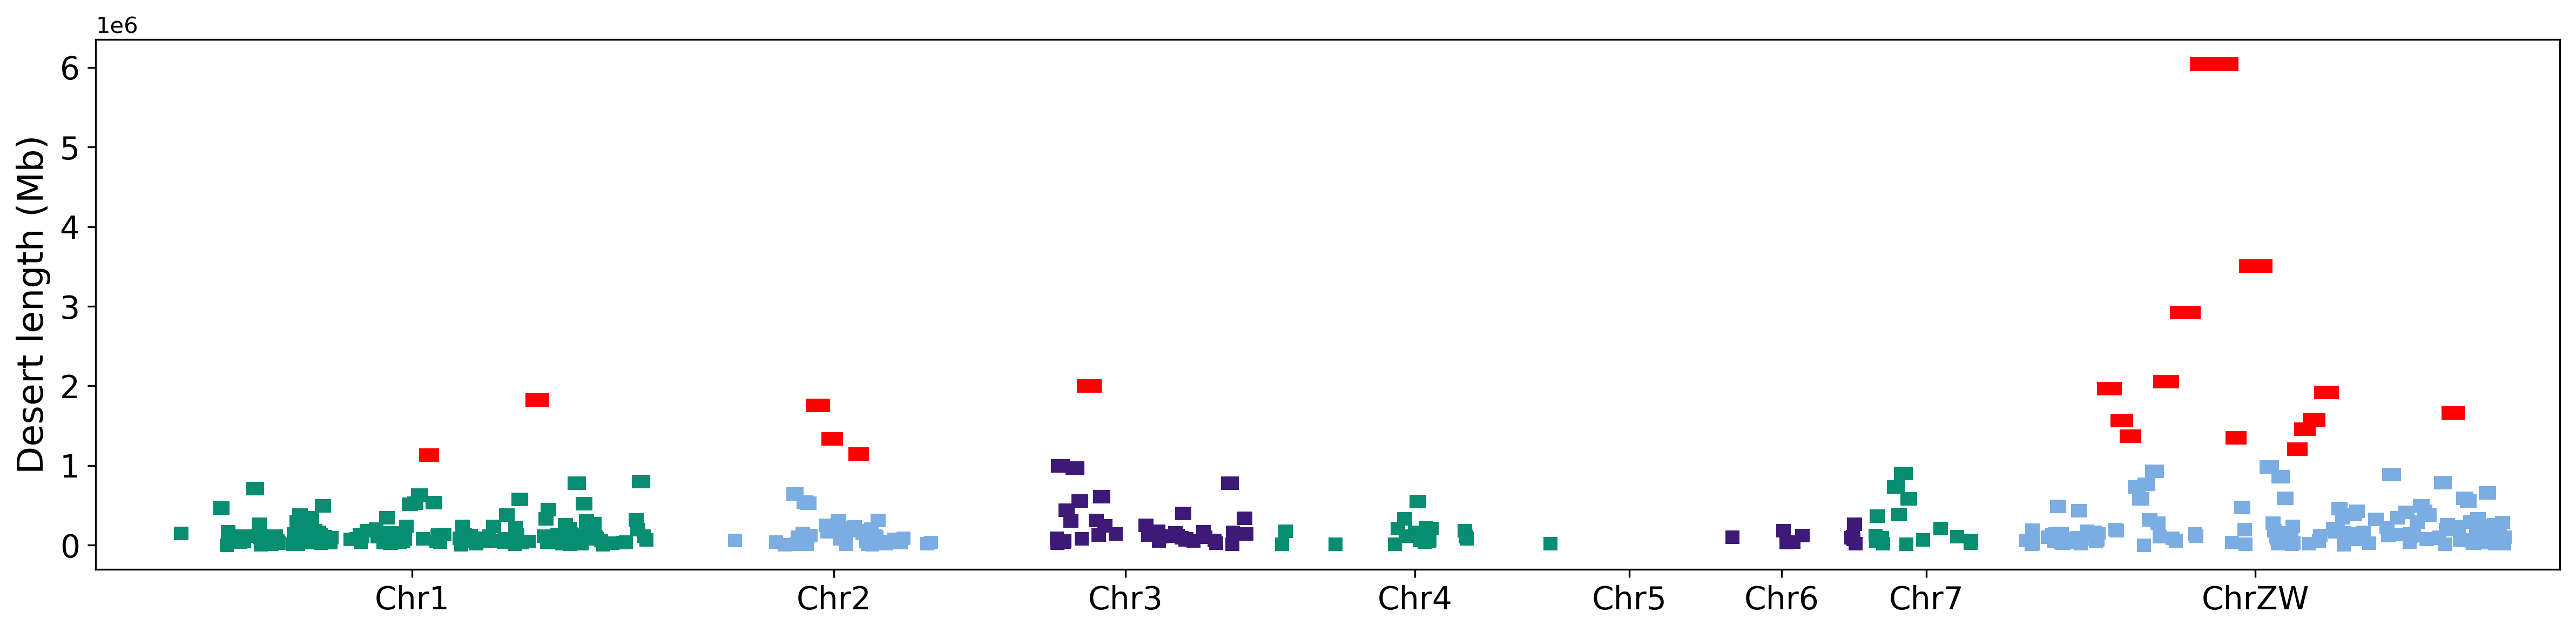

In [156]:
fig, ax = plt.subplots(figsize=(16, 4), facecolor="white", dpi=300)

for i, row in df.iterrows():
    start = row["x_pos_start"]
    end = row["x_pos_end"]
    y = row["size"]
    color=row["color"]

    if row["outlier"] == True:
        color="red"
        
    plt.plot([start, end], [y,y], color=color, linewidth = 6, zorder=2)

    
    plt.plot([start, end], [y,y], color=color, linewidth = 6, zorder=2)
# plt.scatter(df["x_pos_start"], df["robust_z_score"], color=df["color"], s=4, zorder=2)

# Set the x-axis and y-axis labels
ax.set_ylabel("Desert length (Mb)", fontsize=16)
ax.tick_params(axis='y', labelsize=14)

ax.tick_params(axis='x', labelsize=14)
x_ticks  = list(pos_df["mid_tick"].astype(int)[0:8])
x_labels = list(pos_df["contig"].astype(str)[0:8])
ax.set_xticks(x_ticks)
ax.set_xticklabels(["Chr1", "Chr2", "Chr3", "Chr4", "Chr5", "Chr6", "Chr7", "ChrZW"])

# for target in targets:
#     plt.axvline(x=target, color='salmon', linestyle='-', linewidth=2, zorder=1, alpha=0.5)

plt.xlim(-8_000_000, 417_563_131)

plt.tight_layout()

plt.show()

# Save the plot as a 300 dpi PNG file
fig.savefig('intro_desert.png', format='png', facecolor="white", dpi=600, bbox_inches='tight')
fig.savefig('intro_desert.svg', format="svg")



In [182]:
df.loc[df["outlier"] == True]

,chrom,s_pos,e_pos,s_gpos,e_gpos,n_snps,n_sb,n_sh_nw,n_sh_se,perc_sb,...,x_start,x_end,color,size,log_size,mad,robust_z_score,outlier,x_pos_start,x_pos_end
70,NC_067195.1,18330478,20299585,63.87,70.73,169165,0,164,42,1.0,...,338744135,340713242,#7bade3,1969108,14.493091,1.129822,3.545783,True,338744135,340713242
74,NC_067195.1,20695417,22266495,72.11,77.58,123190,0,164,42,1.0,...,341109074,342680152,#7bade3,1571079,14.267273,1.129822,3.345913,True,341109074,342680152
76,NC_067195.1,22275466,23644749,77.61,82.39,119395,0,164,42,1.0,...,342689123,344058406,#7bade3,1369284,14.129799,1.129822,3.224235,True,342689123,344058406
88,NC_067195.1,28084892,30143836,97.86,105.03,143710,0,164,42,1.0,...,348498549,350557493,#7bade3,2058945,14.537704,1.129822,3.585270,True,348498549,350557493
92,NC_067195.1,30961981,33889462,107.88,118.08,195350,0,164,42,1.0,...,351375638,354303119,#7bade3,2927482,14.889653,1.129822,3.896778,True,351375638,354303119
95,NC_067195.1,34416813,40462186,119.92,140.98,369135,0,164,42,1.0,...,354830470,360875843,#7bade3,6045374,15.614804,1.129822,4.538606,True,354830470,360875843
99,NC_067195.1,40536275,41887875,141.24,145.95,108025,0,164,42,1.0,...,360949932,362301532,#7bade3,1351601,14.116800,1.129822,3.212730,True,360949932,362301532
104,NC_067195.1,42847430,46356485,149.29,161.52,294625,0,164,42,1.0,...,363261087,366770142,#7bade3,3509056,15.070858,1.129822,4.057162,True,363261087,366770142
126,NC_067195.1,51128863,52337399,178.15,182.36,105990,0,164,42,1.0,...,371542520,372751056,#7bade3,1208537,14.004921,1.129822,3.113706,True,371542520,372751056
127,NC_067195.1,52361154,53818957,182.44,187.52,119750,0,164,42,1.0,...,372774811,374232614,#7bade3,1457804,14.192442,1.129822,3.279680,True,372774811,374232614


In [177]:
df["size"].median()

35846.0